In [1]:
#!pip uninstall tensorflow

In [2]:
#!pip install tensorflow==2.10.0

In [3]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Kunal Adsule\AppData\Local\Temp\pip-install-zl29qswu\tensorflow-gpu_e28ffacabba64692aa74a3f684fe706d\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu 

In [4]:
!nvidia-smi

Thu Apr  6 20:13:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 517.00       Driver Version: 517.00       CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   39C    P8     4W /  N/A |    782MiB /  4096MiB |     14%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [6]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [8]:
#pip install numpy

In [9]:
#pip install glob2

In [10]:
#pip install matplotlib

In [11]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [13]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:\\Dataset\\train'
valid_path = 'D:\\Dataset\\test'

In [14]:
# Import the VGG-19 library as shown below and add preprocessing layer to the front of VGG-19
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 12s 0us/step


In [15]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [16]:
  # useful for getting number of output classes
folders = glob('D:\\Dataset\\train\\*')

In [17]:
folders

['D:\\Dataset\\train\\COVID19',
 'D:\\Dataset\\train\\NORMAL',
 'D:\\Dataset\\train\\PNEUMONIA',
 'D:\\Dataset\\train\\TURBERCULOSIS']

In [18]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [19]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [20]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:\\Dataset\\train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 12758 images belonging to 4 classes.


In [24]:
test_set = test_datagen.flow_from_directory('D:\\Dataset\\test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 3026 images belonging to 4 classes.


In [25]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Kunal Adsule\AppData\Local\Temp\ipykernel_20636\2724883676.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
798/798 [==============================] - 1789s 2s/step - loss: 0.3555 - accuracy: 0.8814 - val_loss: 0.2477 - val_accuracy: 0.9171
Epoch 2/10
798/798 [==============================] - 1779s 2s/step - loss: 0.2609 - accuracy: 0.9179 - val_loss: 0.5958 - val_accuracy: 0.8486
Epoch 3/10
798/798 [==============================] - 1819s 2s/step - loss: 0.2620 - accuracy: 0.9270 - val_loss: 0.3975 - val_accuracy: 0.9012
Epoch 4/10
798/798 [==============================] - 1834s 2s/step - loss: 0.2312 - accuracy: 0.9366 - val_loss: 0.2956 - val_accuracy: 0.9260
Epoch 5/10
798/798 [==============================] - 1762s 2s/step - loss: 0.1837 - accuracy: 0.9463 - val_loss: 0.3448 - val_accuracy: 0.9200
Epoch 6/10
798/798 [==============================] - 1688s 2s/step - loss: 0.2039 - accuracy: 0.9445 - val_loss: 0.3085 - val_accuracy: 0.9329
Epoch 7/10
798/798 [==============================] - 1610s 2s/step - loss: 0.1854 - accuracy: 0.9520 - val_loss: 0.3214 - val_accuracy:

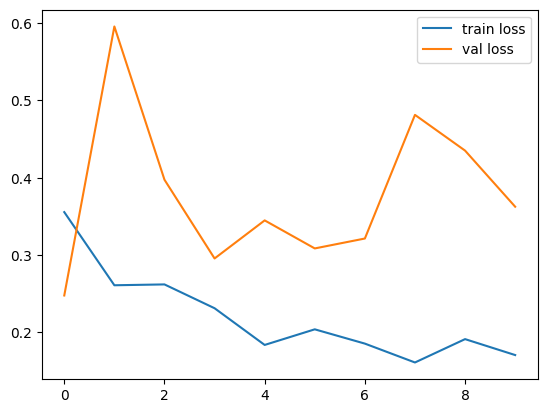

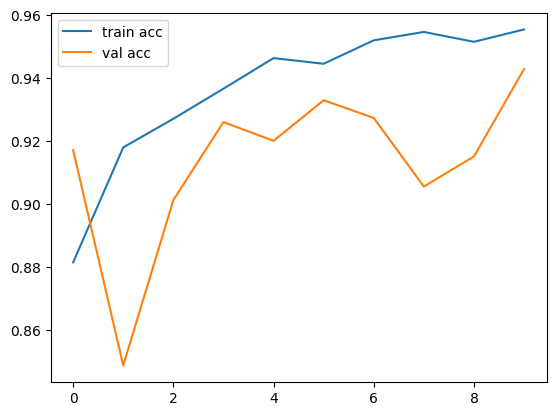

<Figure size 640x480 with 0 Axes>

In [26]:




















# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [27]:
import tensorflow as tf
print(tf. __version__)

2.10.0


In [28]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_Vgg19.h5')

In [29]:
model.evaluate(test_set)

190/190 [==============================] - 298s 2s/step - loss: 0.3625 - accuracy: 0.9428


[0.3625304698944092, 0.9428288340568542]

In [31]:
!pip install scikit-learn

     ---------------------------------------- 0.0/8.4 MB ? eta -:--:--
     - -------------------------------------- 0.4/8.4 MB 7.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.8/8.4 MB 8.4 MB/s eta 0:00:01
     ----- ---------------------------------- 1.2/8.4 MB 8.6 MB/s eta 0:00:01
     ------- -------------------------------- 1.6/8.4 MB 9.5 MB/s eta 0:00:01
     --------- ------------------------------ 2.0/8.4 MB 9.2 MB/s eta 0:00:01
     ----------- ---------------------------- 2.4/8.4 MB 8.9 MB/s eta 0:00:01
     ------------ --------------------------- 2.7/8.4 MB 8.5 MB/s eta 0:00:01
     --------------- ------------------------ 3.1/8.4 MB 8.7 MB/s eta 0:00:01
     --------------- ------------------------ 3.2/8.4 MB 7.9 MB/s eta 0:00:01
     ---------------- ----------------------- 3.5/8.4 MB 7.7 MB/s eta 0:00:01
     ----------------- ---------------------- 3.7/8.4 MB 7.4 MB/s eta 0:00:01
     -------------------- ------------------- 4.3/8.4 MB 7.9 MB/s eta 0

In [35]:
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = ["Covid Pneumonia", "Normal", "Pneumonia", "TB Pneumonia"]
predicted_labels = ["Covid Pneumonia", "Normal", "Pneumonia", "TB Pneumonia"]

# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels,normalize='true')

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [33]:
!pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------------------------------- 293.3/293.3 kB 8.8 MB/s eta 0:00:00


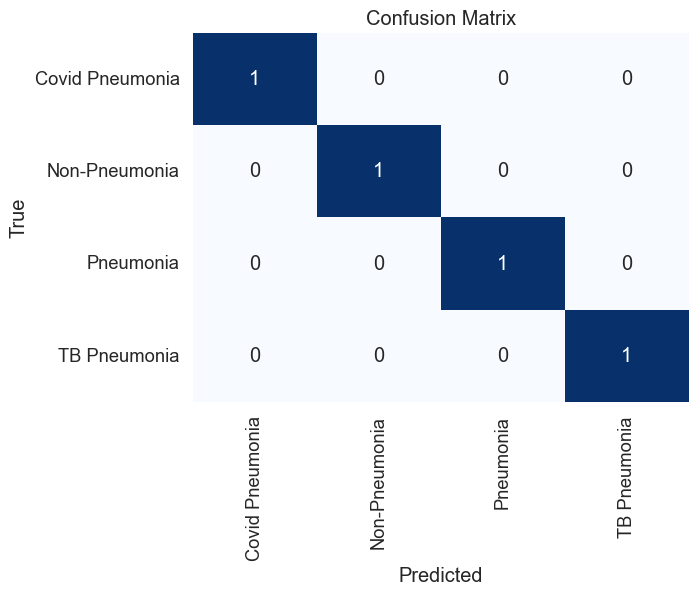

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define the true labels and predicted labels
true_labels = ["Covid Pneumonia", "Non-Pneumonia", "Pneumonia", "TB Pneumonia"]
predicted_labels = ["Covid Pneumonia", "Non-Pneumonia", "Pneumonia", "TB Pneumonia"]

confusion = np.array([[1, 0, 0, 0],
                      [0, 1, 0, 0],
                      [0, 0, 1, 0],
                      [0, 0, 0, 1]])
# Create a confusion matrix using seaborn heatmap
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=predicted_labels, yticklabels=true_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
